# Titanic Survival Prediction

### Importing Libraries and Data

In [19]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Import Dataset

dt=pd.read_csv('Titanic-Dataset.csv')

### EDA

In [21]:
# Understanding the dataset

print(dt.head(),'/n')

print('Number of Records:' ,dt.shape[0])

print('Null Values in Columns\n',dt.isnull().sum())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S   /n

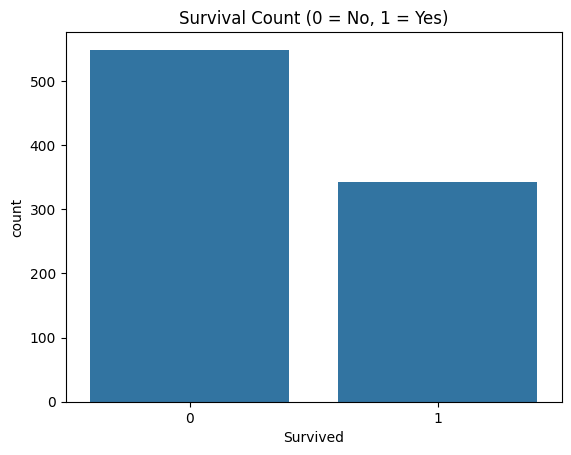

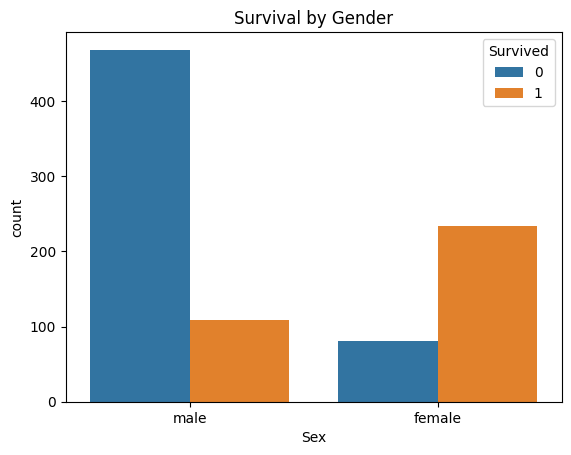

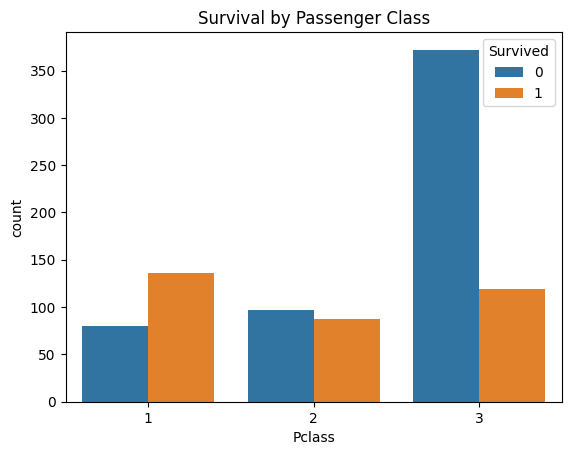

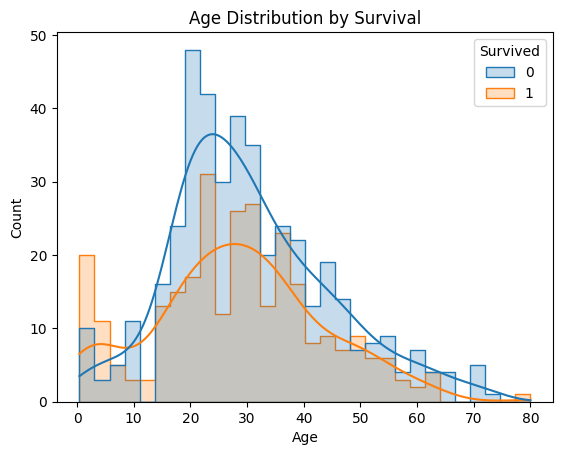

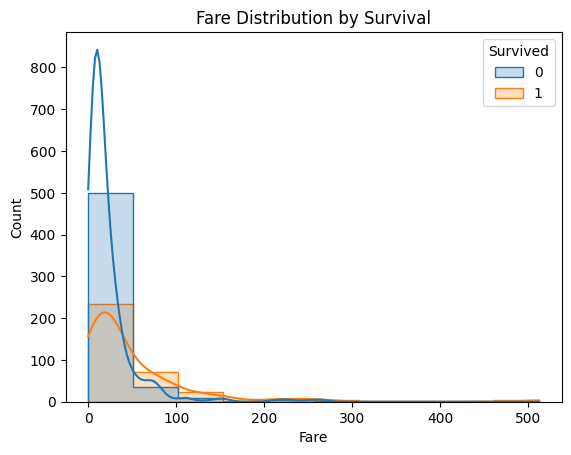

In [22]:
# Survival distribution
sns.countplot(x="Survived", data=dt)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

# Gender vs Survival
sns.countplot(x="Sex", hue="Survived", data=dt)
plt.title("Survival by Gender")
plt.show()

# Class vs Survival
sns.countplot(x="Pclass", hue="Survived", data=dt)
plt.title("Survival by Passenger Class")
plt.show()

# Age distribution by Survival
sns.histplot(data=dt, x="Age", hue="Survived", bins=30, kde=True, element="step")
plt.title("Age Distribution by Survival")
plt.show()


# Fare distribution by Survival
sns.histplot(data=dt, x="Fare", hue="Survived", bins=10, kde=True, element="step")
plt.title("Fare Distribution by Survival")
plt.show()




### Data Cleaning



Too Many Null Values in Cabin - Better to remove the column

PassengerId, Name, Ticket columns have no relation with Survivability thus can be removed

Imputing the Age Null values with Median

Filling the Embarked Column with Mode


In [23]:
# Dropping irrelevant columns
dt = dt.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Handling Missing Values
imputer = SimpleImputer(strategy="median")
dt["Age"] = imputer.fit_transform(dt[["Age"]])
dt["Embarked"] = dt["Embarked"].fillna(dt["Embarked"].mode()[0])

# Encode categorical variables
le = LabelEncoder()
dt["Sex"] = le.fit_transform(dt["Sex"])       # male=1, female=0
dt["Embarked"] = le.fit_transform(dt["Embarked"])


### Modeling

#### Random Forest

In [ ]:
x = dt.drop("Survived", axis=1)
y = dt["Survived"]

# Train-Test (8:2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=342)

# Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=342)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)


#### Logistic Regression

In [ ]:
# Logistic Regression model
model_log = LogisticRegression(max_iter=200)
model_log.fit(x_train, y_train)
y_pred_log = model_log.predict(x_test)

### Result Comparison

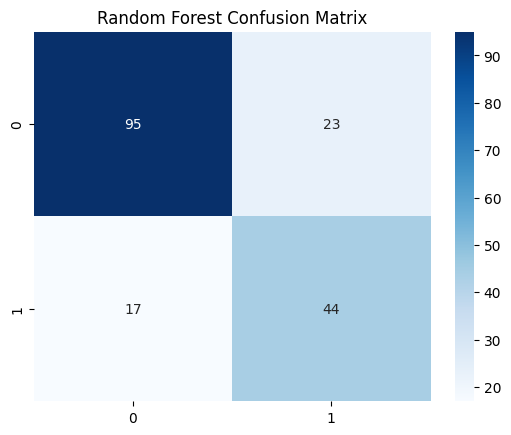

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

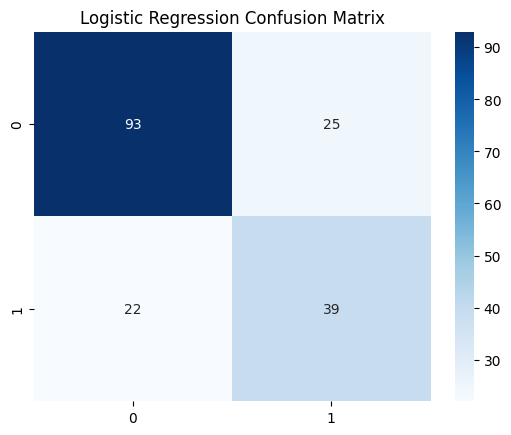

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [28]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       118
           1       0.66      0.72      0.69        61

    accuracy                           0.78       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [30]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       118
           1       0.61      0.64      0.62        61

    accuracy                           0.74       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.74      0.74      0.74       179



Random Forest has better Accuracy (78%) compared to Logistic Regression